In [2]:
from netCDF4 import Dataset

In [3]:
rootgrp = Dataset("cygnss_data.nc", "r", format="NETCDF4")

print(rootgrp)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6, ACDD-1.3, ISO-8601
    standard_name_vocabulary: CF Standard Name Table v30
    project: CYGNSS
    featureType: trajectory
    summary: CYGNSS is a NASA Earth Venture mission, managed by the Earth System Science Pathfinder Program. The mission consists of a constellation of eight small satellites. The eight observatories comprise a constellation that measures the ocean surface wind field with very high temporal resolution and spatial coverage, under all precipitating conditions, and over the full dynamic range of wind speeds experienced in a tropical cyclone. The CYGNSS observatories fly in 510 km circular orbits at a common inclination of 35°. Each observatory includes a Delay Doppler Mapping Instrument (DDMI) consisting of a modified GPS receiver capable of measuring surface scattering, a low gain zenith antenna for measurement of the direct GPS signal, and two high gain na

In [4]:
def walktree(top):
    values = top.groups.values()
    yield values
    for value in top.groups.values():
        for children in walktree(value):
            yield children

In [5]:
for var in rootgrp.variables:
    print(var)

sample
ddm
spacecraft_id
spacecraft_num
ddm_source
ddm_time_type_selector
delay_resolution
dopp_resolution
ddm_timestamp_utc
ddm_timestamp_gps_week
ddm_timestamp_gps_sec
pvt_timestamp_utc
pvt_timestamp_gps_week
pvt_timestamp_gps_sec
att_timestamp_utc
att_timestamp_gps_week
att_timestamp_gps_sec
sc_pos_x
sc_pos_y
sc_pos_z
sc_vel_x
sc_vel_y
sc_vel_z
sc_pos_x_pvt
sc_pos_y_pvt
sc_pos_z_pvt
sc_vel_x_pvt
sc_vel_y_pvt
sc_vel_z_pvt
nst_att_status
sc_roll
sc_pitch
sc_yaw
sc_roll_att
sc_pitch_att
sc_yaw_att
sc_lat
sc_lon
sc_alt
zenith_sun_angle_az
zenith_sun_angle_decl
zenith_ant_bore_dir_x
zenith_ant_bore_dir_y
zenith_ant_bore_dir_z
rx_clk_bias
rx_clk_bias_rate
rx_clk_bias_pvt
rx_clk_bias_rate_pvt
lna_temp_nadir_starboard
lna_temp_nadir_port
lna_temp_zenith
ddm_end_time_offset
bit_ratio_hi_lo_starboard
bit_ratio_hi_lo_port
bit_null_offset_starboard
bit_null_offset_port
status_flags_one_hz
prn_code
sv_num
track_id
ddm_ant
zenith_code_phase
sp_precise_delay
sp_precise_dopp
add_range_to_sp
add_ran

In [6]:
for var in rootgrp.variables:
    print("-----")
    print(rootgrp.variables[var])

-----
<class 'netCDF4._netCDF4.Variable'>
int32 sample(sample)
    long_name: Sample index
    units: 1
    comment: The netCDF coordinate variable associated with the sample dimension, which enumerates the zero-justified index range of the DDM time instants contained in the file.
unlimited dimensions: 
current shape = (85146,)
filling on, default _FillValue of -2147483647 used

-----
<class 'netCDF4._netCDF4.Variable'>
int8 ddm(ddm)
    long_name: DDM reflectometry channel
    units: 1
    comment: The netCDF coordinate variable associated with variables that are dimensioned by the 4 DDMI reflectometry channels. It enumerates the zero-justified index range of DDM reflectometry channels. Ranges from 0 to 3.
unlimited dimensions: 
current shape = (4,)
filling on, default _FillValue of -127 ignored

-----
<class 'netCDF4._netCDF4.Variable'>
int16 spacecraft_id()
    long_name: CCSDS spacecraft identifier
    units: 1
    comment: The CCSDS spacecraft identifier:
	0xF7 (247): CYGNSS 1
	0x

In [7]:
print(rootgrp.variables['raw_counts'])

<class 'netCDF4._netCDF4.Variable'>
int32 raw_counts(sample, ddm, delay, doppler)
    long_name: DDM bin raw counts
    coordinates: ddm_timestamp_utc sp_lat sp_lon
    units: 1
    _FillValue: -9999
    comment: 17 x 11 array of DDM bin raw counts These are the uncalibrated power values produced by the DDMI.
unlimited dimensions: 
current shape = (85146, 4, 17, 11)
filling on


In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

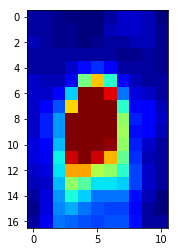

In [9]:
fig = plt.figure()

ddm = rootgrp.variables['power_analog'][0+38490-200,1]
im = plt.imshow(ddm, cmap='jet', animated=True)

def animate(i):
    ddm = rootgrp.variables['power_analog'][i+38480-200,1]
    im.set_array(ddm)
    return im
# total number of frames = 85146
ani = animation.FuncAnimation(fig, animate, frames=500, interval=250)
HTML(ani.to_html5_video())

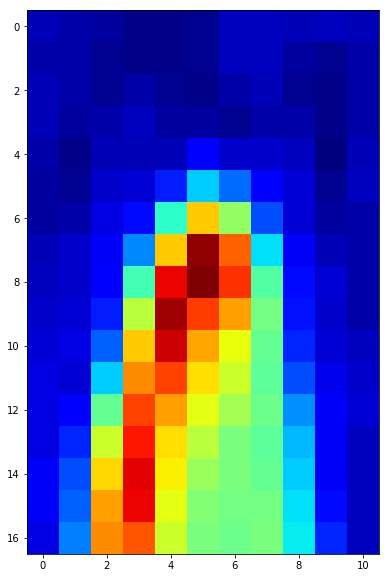

In [89]:

fig = plt.figure(figsize=(20, 10))


ddm = rootgrp.variables['power_analog'][54120,0]


im = plt.imshow(ddm, cmap='jet', animated=True)

2018-08-13T00:00:00.999261466Z
2018-08-13T00:00:00


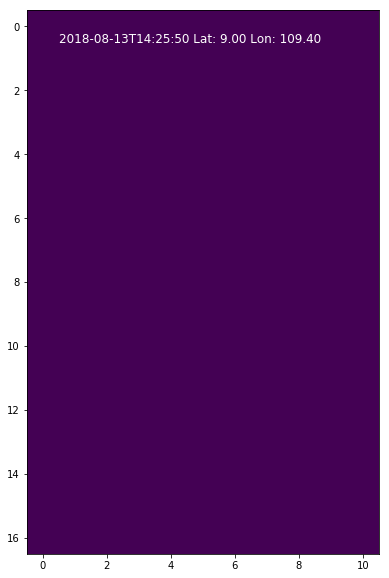

In [93]:
fig = plt.figure(figsize=(20, 10))

date = rootgrp.time_coverage_start

from datetime import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from netCDF4 import Dataset
import os

filename = os.path.join(os.environ['CYGNSS_ROOT'], 'raw/cyg08.ddmi.s20180813-000000-e20180813-235959.l1.power-brcs.a20.d20.nc')
rootgrp = Dataset(filename, "r", format="NETCDF4")


print(rootgrp.time_coverage_start)
print(rootgrp.time_coverage_start.split('.')[0])

start = 51805-25
channel = 1

ddm = rootgrp.variables['power_analog'][start][channel].data

start_datetime = datetime.strptime(rootgrp.time_coverage_start.split('.')[0],'%Y-%m-%dT%H:%M:%S')
date = start_datetime.strftime('%Y-%m-%dT%H:%M:%S')
lat = rootgrp.variables['sp_lat'][start][channel]
lon = rootgrp.variables['sp_lon'][start][channel]

string = str(date) + ' Lat: ' + "{0:.2f}".format(lat) + ' Lon: ' + "{0:.2f}".format(lon)

im = plt.imshow(ddm, cmap='viridis')
t = plt.text(0.5, 0.5, string, {'color': 'w', 'fontsize': 12})


def animate(i):
    ddm = rootgrp.variables['power_analog'][start+i][channel].data
    sec = rootgrp.variables['ddm_timestamp_utc'][start+i].data
    new_date = start_datetime + timedelta(seconds=float(sec))
    date = new_date.strftime('%Y-%m-%dT%H:%M:%S')
    lat = rootgrp.variables['sp_lat'][start+i][channel]
    lon = rootgrp.variables['sp_lon'][start+i][channel]
    string = str(date) + ' Lat: ' + "{0:.2f}".format(lat) + ' Lon: ' + "{0:.2f}".format(lon)
    
    t.set_text(string)
    im.set_array(ddm)
    return im, t

ani = animation.FuncAnimation(fig, animate, frames=50, blit=True, interval=100)
#Play video
HTML(ani.to_html5_video())



In [61]:
sec = rootgrp.variables['ddm_timestamp_utc'][start].data
new_date = start_datetime + timedelta(seconds=float(sec))
new_date.strftime('%Y-%m-%dT%H:%M:%S')

'2018-08-13T10:41:30'